#Fashion_MNIST_Classification_Project


Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow.keras as tk

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X_test.shape, y_test.shape


((10000, 28, 28), (10000,))

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

In [7]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

Show Images

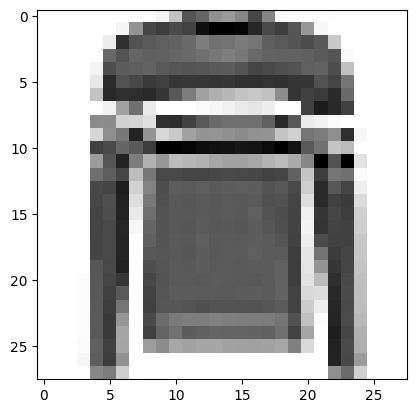

In [8]:
plt.imshow(X_train[5], cmap ='Greys')

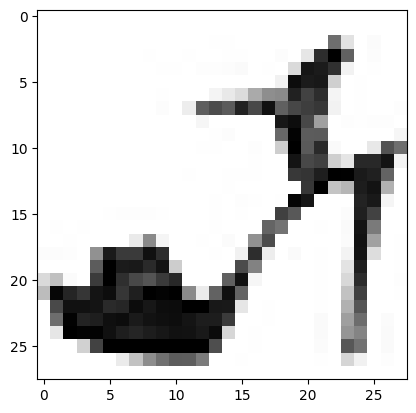

In [9]:
plt.imshow(X_train[9], cmap ='Greys')

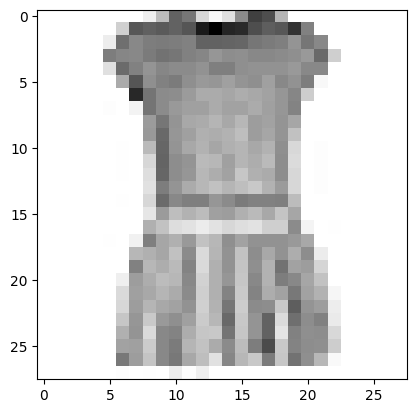

In [10]:
plt.imshow(X_train[3], cmap ='Greys')

In [11]:
y_test[3]

1

#Display Images

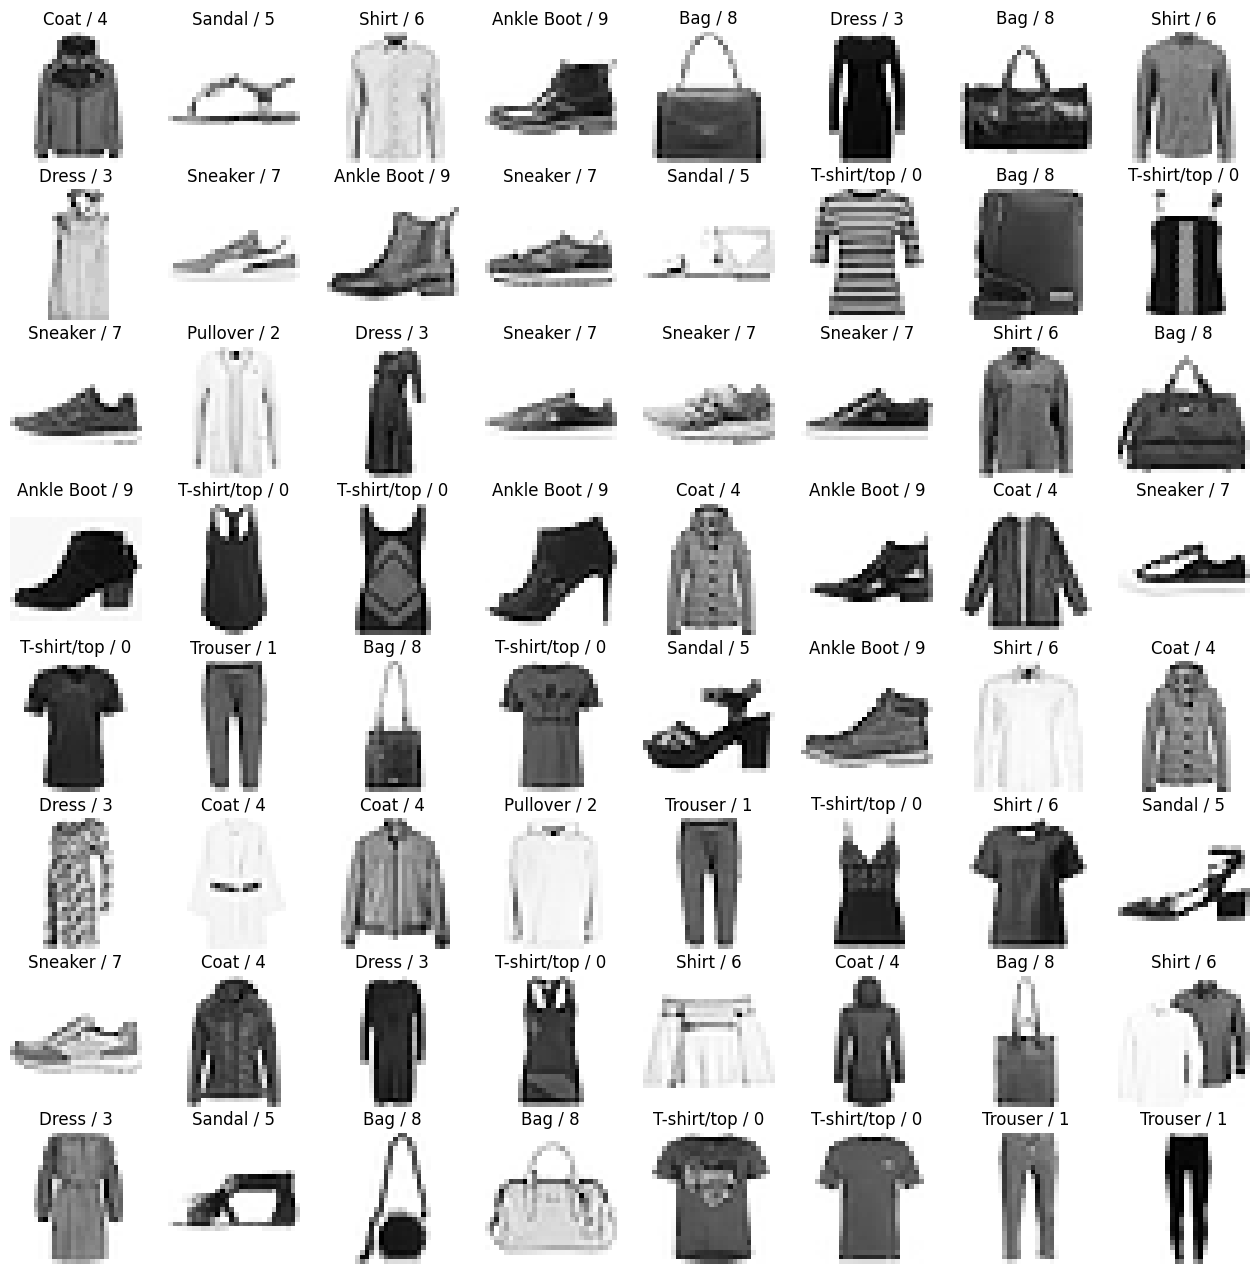

In [12]:
plt.figure(figsize = (16,16))
j = 1
for i in np.random.randint(0,1000,64):
  plt.subplot(8,8,j); j+=1
  plt.imshow(X_train[i], cmap = "Greys")
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [13]:
X_train.ndim

3

In [14]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [15]:
X_train.ndim

4

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state = 2024)

In [20]:
X_train.shape, y_train.shape

((42000, 28, 28, 1), (42000,))

In [21]:
X_val.shape, y_val.shape

((18000, 28, 28, 1), (18000,))

#CNN-Model Building

In [22]:
model=keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax'),
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=35, batch_size=1024, verbose=1, validation_data=(X_val, y_val))

Epoch 1/35
42/42 [==============================] - 1s 16ms/step - loss: 0.0873 - accuracy: 0.9709 - val_loss: 0.2704 - val_accuracy: 0.9162
Epoch 2/35
42/42 [==============================] - 1s 14ms/step - loss: 0.0840 - accuracy: 0.9723 - val_loss: 0.2712 - val_accuracy: 0.9148
Epoch 3/35
42/42 [==============================] - 1s 14ms/step - loss: 0.0771 - accuracy: 0.9760 - val_loss: 0.2746 - val_accuracy: 0.9156
Epoch 4/35
42/42 [==============================] - 1s 14ms/step - loss: 0.0755 - accuracy: 0.9756 - val_loss: 0.2791 - val_accuracy: 0.9151
Epoch 5/35
42/42 [==============================] - 1s 14ms/step - loss: 0.0719 - accuracy: 0.9776 - val_loss: 0.2659 - val_accuracy: 0.9175
Epoch 6/35
42/42 [==============================] - 1s 14ms/step - loss: 0.0689 - accuracy: 0.9794 - val_loss: 0.2841 - val_accuracy: 0.9111
Epoch 7/35
42/42 [==============================] - 1s 12ms/step - loss: 0.0702 - accuracy: 0.9780 - val_loss: 0.3029 - val_accuracy: 0.9066
Epoch 8/35
42

#Test the Model

In [26]:
model.predict(np.expand_dims(X_test[0], axis=0)).round(3)

1/1 [==============================] - 0s 97ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.002, 0.   ,
        0.997]], dtype=float32)

In [27]:
np.argmax(model.predict(np.expand_dims(X_test[0], axis=0)).round(3))

1/1 [==============================] - 0s 22ms/step


9

In [28]:
y_pred = model.predict(X_test).round(3)
y_pred

313/313 [==============================] - 1s 2ms/step


array([[0.   , 0.   , 0.   , ..., 0.002, 0.   , 0.997],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.001, ..., 0.   , 0.996, 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.002, 0.   , 0.01 , ..., 0.207, 0.04 , 0.004]], dtype=float32)

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9041


[0.2672455608844757, 0.9041000008583069]

Visualise Output

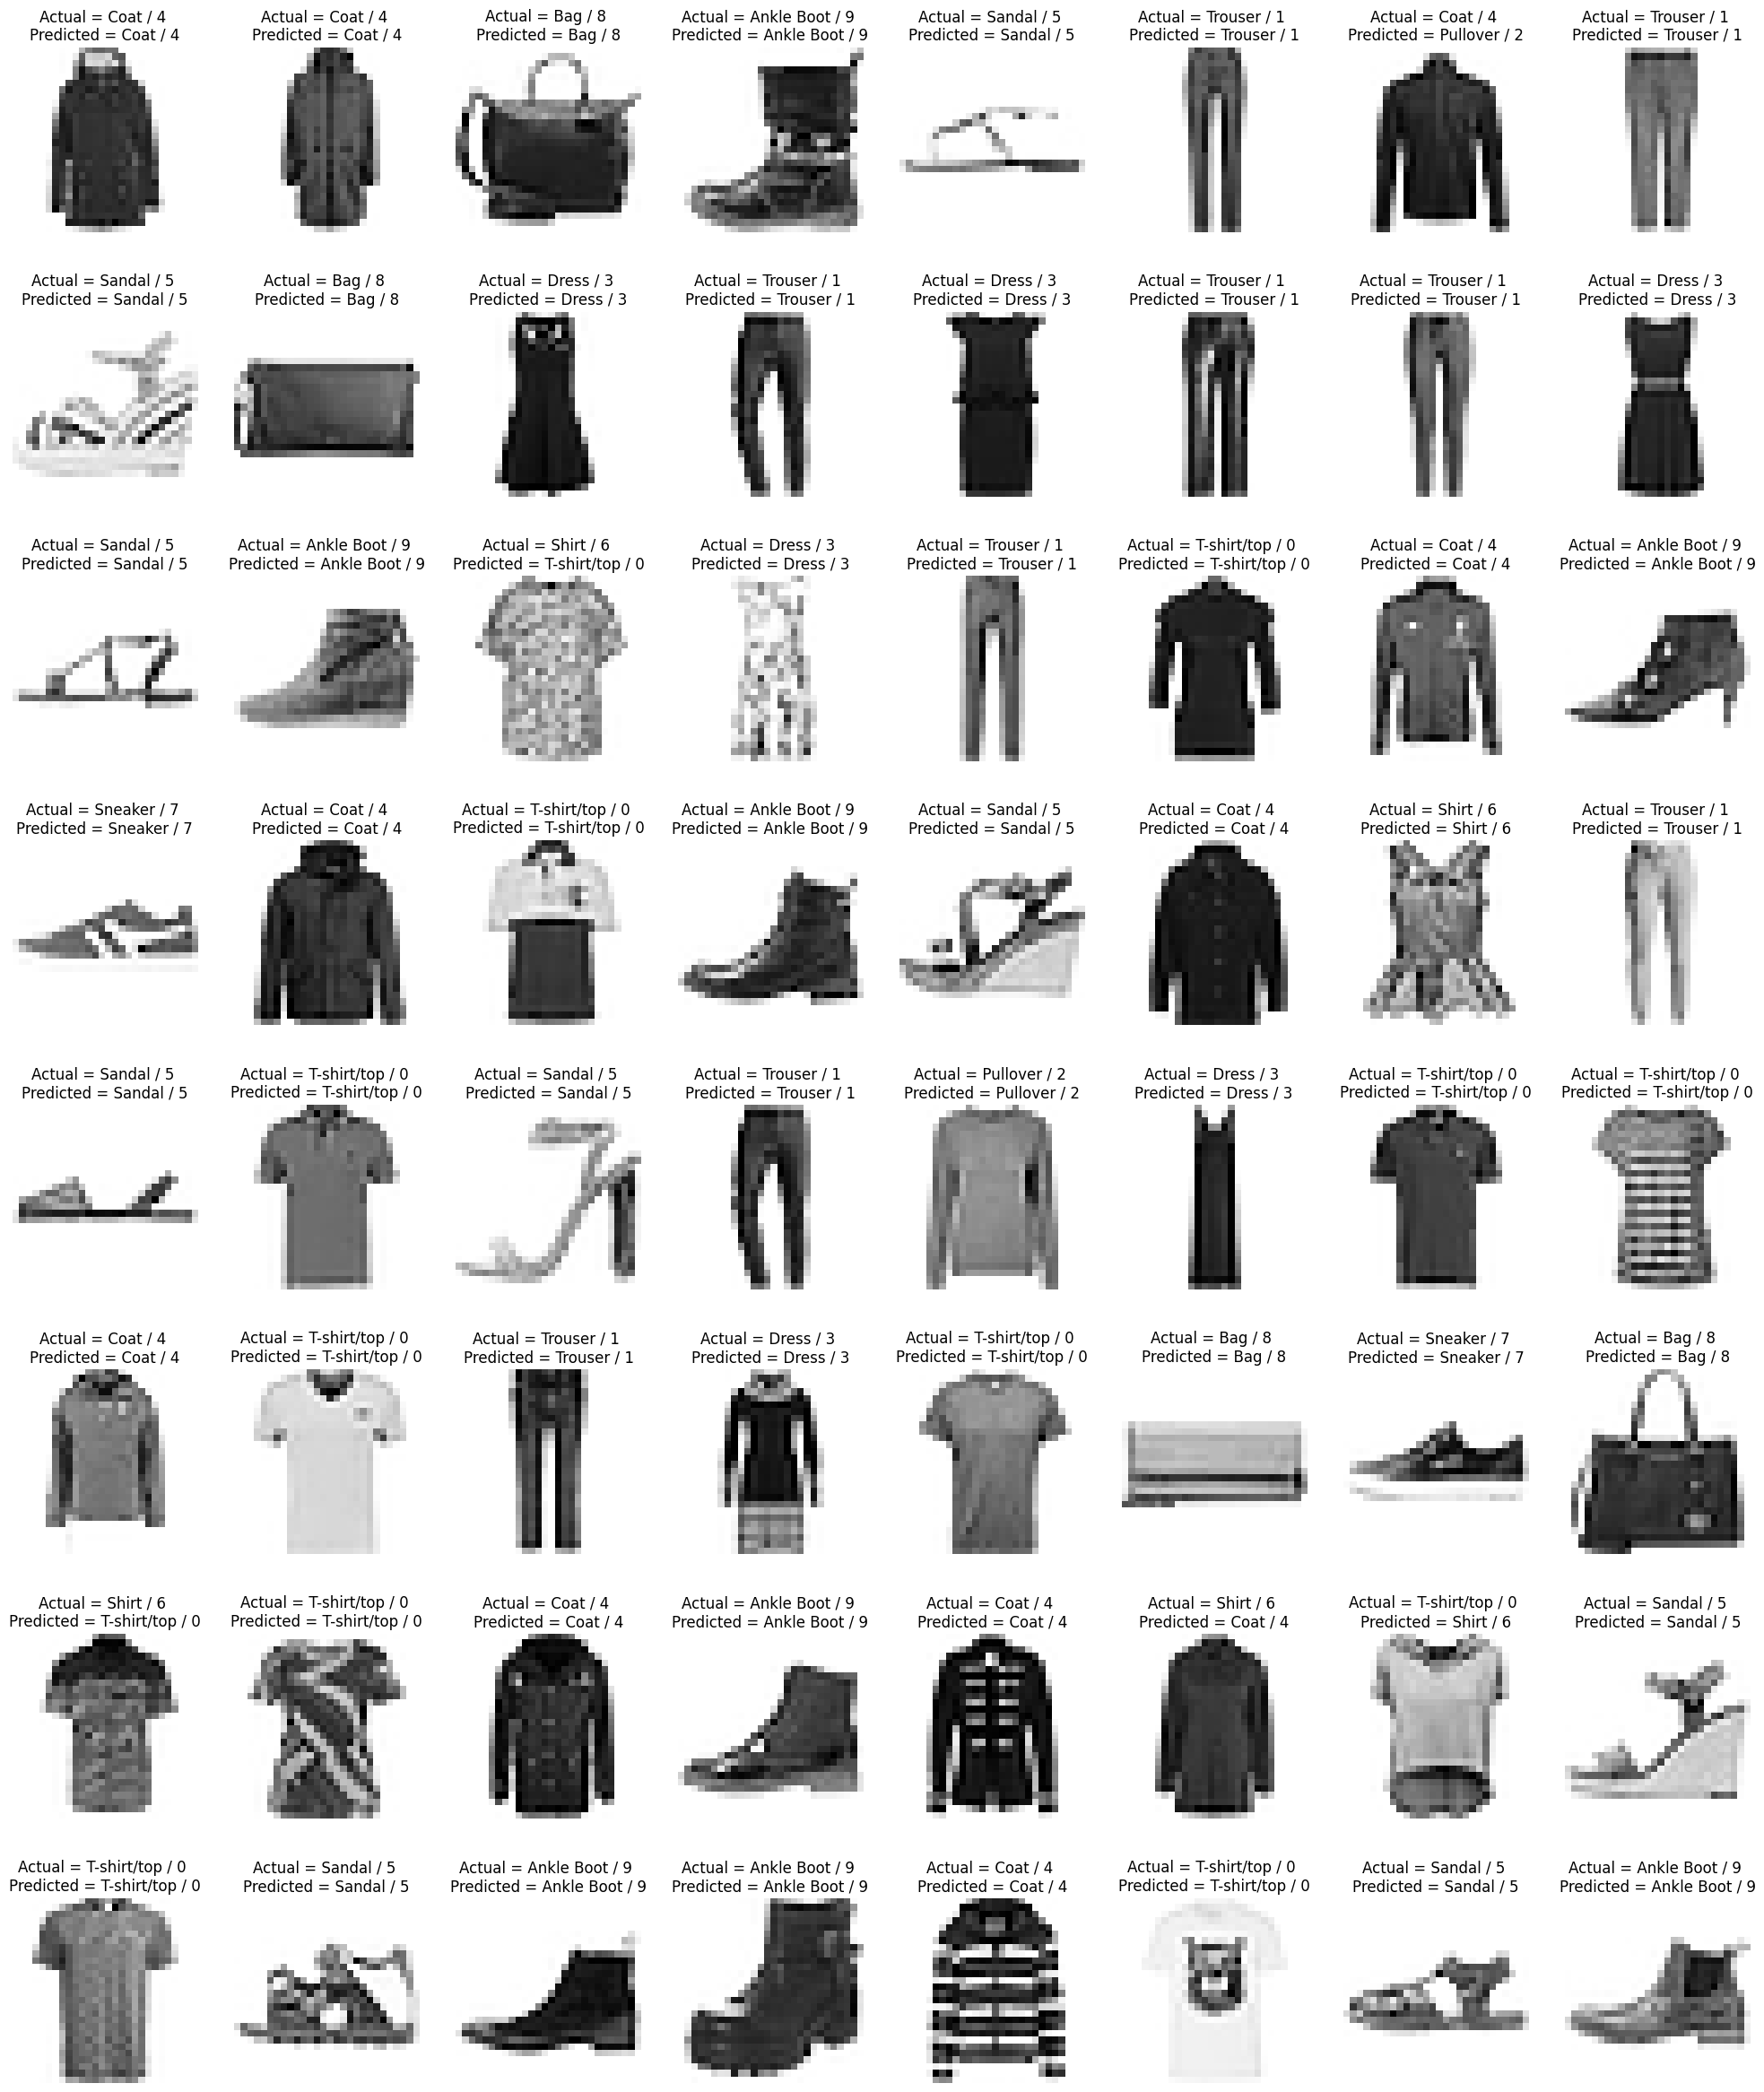

In [30]:
plt.figure(figsize = (25,30))
j = 1
for i in np.random.randint(0,1000,64):
  plt.subplot(8,8,j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = "Greys")
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis('off')

#Confusion Matrix

<Axes: >

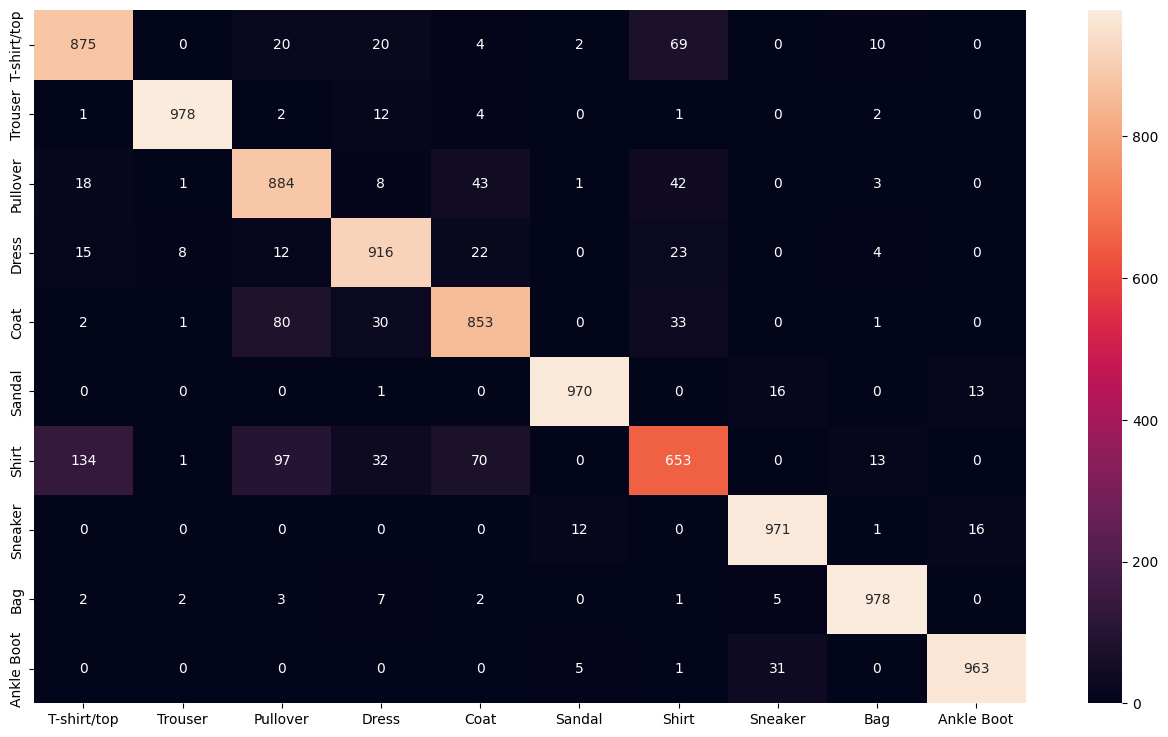

In [40]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test, y_pred_labels)

#show cm
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)

In [42]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.81      0.88      0.84      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.85      0.85      0.85      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.79      0.65      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle Boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [33]:
model.save('Adarsh_coincent_classification_cnn_model.h5')

In [44]:
path = '/content/drive/MyDrive/Colab Notebooks/Adarsh_coincent_classification_cnn_model_2.h5'
model.save(path)

In [35]:
model_deploy = keras.models.load_model('Adarsh_coincent_classification_cnn_model.h5')

In [36]:
model_deploy.predict(X_test).round(3)

313/313 [==============================] - 1s 2ms/step


array([[0.   , 0.   , 0.   , ..., 0.002, 0.   , 0.997],
       [0.   , 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.001, ..., 0.   , 0.996, 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.002, 0.   , 0.01 , ..., 0.207, 0.04 , 0.004]], dtype=float32)

In [37]:
model_deploy.predict(np.expand_dims(X_test[6], axis=0)).round(2)

1/1 [==============================] - 0s 19ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)